# Fair or Not: Evidence from HMDA Data

# ORIE 4741 Final Project —— Chenghao Li, Yiwei Zhang, Anji Zhao

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span>
            <a href="#0.Introduction" data-toc-modified-id="0.Introduction-2">
                <span class="toc-item-num">0&nbsp;&nbsp;</span>Introduction</a>
        <li><span>
            <a href="#1.Data-Preprocessing-——-Part-1" data-toc-modified-id="1.Data-Preprocessing-——-Part-1-1">
                <span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preprocessing——Part 1</a>
            </span></li>
                <li><span>
            <a href="#2.-Data-Visualization" data-toc-modified-id="2.-Data-Visualization-1">
                <span class="toc-item-num">2&nbsp;&nbsp;</span>Data Visualization</a>
                    <li><span>
            <a href="#3.-Data-Preprocessing-——-Part-2" data-toc-modified-id="3.-Data-Preprocessing-——-Part-2-1">
                <span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing——Part 2</a>
                        <li><span>
            <a href="#4.-Model-Implementaion" data-toc-modified-id="4.-Model-Implementaion-1">
                <span class="toc-item-num">4&nbsp;&nbsp;</span>Model Implementaion</a>
                            <li><span>
            <a href="#5.-Evaluate-the-models-and-Future-Improvement" data-toc-modified-id="5.-Evaluate-the-models-and-Future-Improvement-1">
                <span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluate the models and Future Improvement</a>
                                <li><span>
            <a href="#6.-References-of-Source-Code" data-toc-modified-id="6.-References-of-Source-Code">
                <span class="toc-item-num">6&nbsp;&nbsp;</span>References of Source Code</a>
 
 
 
   </ul></div>

## 0.Introduction

In this project, we propose to apply machine learning algorithms we learned from the course ORIE 4741 to explore the Home Mortgage Disclosure Act (HMDA) Data. We try to answer the following question: Which type of the applicants is more likely to get credits and whether our model is unfair to some particular individuals or ethnicity groups? In order to answer this question, we plan to first clean the dataset and do some descriptive statistics to see if there are any patterns. Then we will implement supervised learning algorithms to do predictions for the mortgage applications. Also, we will do Principle Component Analysis to figure out particular features that are important to the predictions. Finally, we will examine the prediction results by different ethnicity groups to see whether our model is fair or not.

Housing mortgage loan is one of the most important financial instruments that enable borrowing a property without paying the whole type. During the year of 2007 to 2008, mortgage loan was known as a crucial cause to the global financial crisis. Housing mortgage loan granting procesure theoretically relies on applicants' background information, and it is important for the banks to predict whether an applicant should be approved in order to avoid default risk. However, one model may not fit all people in this country. Different races, ethnicities, genders are supposed to have equal opportunities to get approved, therefore, it is also crucial to ensure the model takes only financial conditions into account.

Since we focus on home mortgage opportunities in this project, the data set we plan to use is the Home Mortgage Disclosure Act (HMDA) listed in www.consumerfinance.gov from 2007 to 2012. The data set contains many valuable variables, such as denial reason, loan purpose, loan type, which can extract interesting information through appropriate modeling. Moreover, the HMDA data set contains variables about race, ethnicity and sex, which allows us to explore in depth whether the our fitted model is fair or not. In addition, our data set covers both the subprime mortgage crisis and the post-crisis period, so we can study the impact of the crisis over the housing mortgage system.

The innovative part of the project are:

## 1.Data Preprocessing —— Part 1

### (1) Import the data and explore the data

Data is here: https://www.consumerfinance.gov/data-research/hmda/historic-data/?geo=dc&records=all-records&field_descriptions=codes

In [86]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

In [87]:
#Import the data
df_07 = pd.read_csv("hmda_2007_dc_all-records_codes.csv")
df_08 = pd.read_csv("hmda_2008_dc_all-records_codes.csv")
df_09 = pd.read_csv("hmda_2009_dc_all-records_codes.csv")
df_10 = pd.read_csv("hmda_2010_dc_all-records_codes.csv")
df_11 = pd.read_csv("hmda_2011_dc_all-records_codes.csv")
df_12 = pd.read_csv("hmda_2012_dc_all-records_codes.csv")

In [88]:
df_07.head()

,as_of_year,respondent_id,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,action_taken,...,lien_status,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2007,58-0692236,3,1,1,1,1,400,3,1,...,1,NaN,8675,2578.0,87.940002,92600.0,69.790001,807.0,1199.0,0
1,2007,0003211759,2,1,1,1,1,416,2,1,...,1,6.0,14,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2007,33-0668958,7,1,1,3,1,340,3,1,...,1,NaN,126,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2007,0003211759,2,1,1,1,1,200,2,1,...,1,6.0,16,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2007,0001072246,2,1,1,1,2,71,2,1,...,2,NaN,343428,4696.0,24.809999,92600.0,134.149994,1097.0,581.0,0


In [89]:
df = pd.concat([df_07, df_08, df_09, df_10, df_11, df_12])

In [90]:
#showing the features
df_07.columns

Index(['as_of_year', 'respondent_id', 'agency_code', 'loan_type',
       'property_type', 'loan_purpose', 'owner_occupancy', 'loan_amount_000s',
       'preapproval', 'action_taken', 'msamd', 'state_code', 'county_code',
       'census_tract_number', 'applicant_ethnicity', 'co_applicant_ethnicity',
       'applicant_race_1', 'applicant_race_2', 'applicant_race_3',
       'applicant_race_4', 'applicant_race_5', 'co_applicant_race_1',
       'co_applicant_race_2', 'co_applicant_race_3', 'co_applicant_race_4',
       'co_applicant_race_5', 'applicant_sex', 'co_applicant_sex',
       'applicant_income_000s', 'purchaser_type', 'denial_reason_1',
       'denial_reason_2', 'denial_reason_3', 'rate_spread', 'hoepa_status',
       'lien_status', 'edit_status', 'sequence_number', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'application_date_indicator'],
      dtyp

In [91]:
df['action_taken'].value_counts()

1    120923
6     53720
3     38211
4     24017
2     11469
5      6605
7        30
8         1
Name: action_taken, dtype: int64

In [92]:
df = df.loc[(df['applicant_race_1'] == 3) | (df['applicant_race_1'] == 5), :]
df['action_taken'].value_counts()

1    89890
3    28050
6    23496
4    16021
2     8538
5     4257
7       22
8        1
Name: action_taken, dtype: int64

In [93]:
df.loc[df.action_taken == 8, 'action_taken'] = 1
df.loc[df.action_taken == 7, 'action_taken'] = 3
df.loc[df.action_taken == 5, 'action_taken'] = 3
df.loc[df.action_taken == 2, 'action_taken'] = 1
df.loc[df.action_taken == 6, 'action_taken'] = 2
df.loc[df.action_taken == 2, 'action_taken'] = 1
df.loc[df.action_taken == 3, 'action_taken'] = 0
df = df[df['action_taken'] != 4 ]
df['action_taken'].value_counts()

1    121925
0     32329
Name: action_taken, dtype: int64

In [190]:
df['applicant_race_1'].value_counts()

5    96885
3    56165
Name: applicant_race_1, dtype: int64

### (2) Feature selection

Drop those features which are (1) can be inferred from other features (colinearlity), (2) useless information (we have done some literature review works and knew some of the features have very little explantory power), (3) have missing value for almost all the observations.

In [94]:
df = df[['action_taken', 'as_of_year', 'agency_code', 'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy', 'loan_amount_000s', 'preapproval', 'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race_1', 'co_applicant_race_1', 'applicant_sex', 'co_applicant_sex','applicant_income_000s', 'purchaser_type']]
df

,action_taken,as_of_year,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,applicant_ethnicity,co_applicant_ethnicity,applicant_race_1,co_applicant_race_1,applicant_sex,co_applicant_sex,applicant_income_000s,purchaser_type
1,1,2007,2,1,1,1,1,416,2,2,5,3,8,2,5,NaN,7
2,1,2007,7,1,1,3,1,340,3,2,5,5,8,2,5,65.0,8
3,1,2007,2,1,1,1,1,200,2,2,5,3,8,2,5,NaN,7
4,1,2007,2,1,1,1,2,71,2,2,3,5,6,1,3,325.0,0
5,1,2007,2,1,1,1,1,920,2,1,5,5,8,1,5,NaN,7
6,1,2007,7,1,1,1,1,401,3,2,5,5,8,1,5,70.0,9
7,1,2007,2,1,1,1,1,95,2,2,5,3,8,1,5,NaN,7
8,1,2007,7,1,1,1,1,399,2,2,5,3,8,1,5,23.0,0
9,1,2007,2,1,1,1,1,379,2,2,5,3,8,1,5,NaN,7
11,1,2007,2,1,1,1,1,127,2,2,5,3,8,2,5,NaN,7


In [95]:
#list the features
print(df.columns)

Index(['action_taken', 'as_of_year', 'agency_code', 'loan_type',
       'property_type', 'loan_purpose', 'owner_occupancy', 'loan_amount_000s',
       'preapproval', 'applicant_ethnicity', 'co_applicant_ethnicity',
       'applicant_race_1', 'co_applicant_race_1', 'applicant_sex',
       'co_applicant_sex', 'applicant_income_000s', 'purchaser_type'],
      dtype='object')


In [96]:
#list the data types
df.dtypes

action_taken                int64
as_of_year                  int64
agency_code                 int64
loan_type                   int64
property_type               int64
loan_purpose                int64
owner_occupancy             int64
loan_amount_000s            int64
preapproval                 int64
applicant_ethnicity         int64
co_applicant_ethnicity      int64
applicant_race_1            int64
co_applicant_race_1         int64
applicant_sex               int64
co_applicant_sex            int64
applicant_income_000s     float64
purchaser_type              int64
dtype: object

In [97]:
df.to_csv("new_data_featured.csv") #keep a csv copy of the adjusted data.

## 2. Data Visualization

In this part, in order to do more data preprocessing work, we need to visualize the data and check if there are any noticeable patterns. Note that we do have a short explanation below each graph we plotted.

### (1) Distribution of Numeric Features

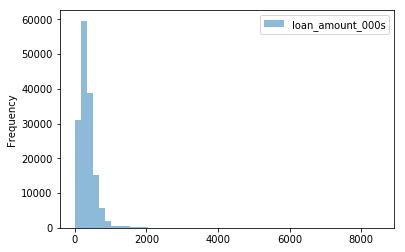

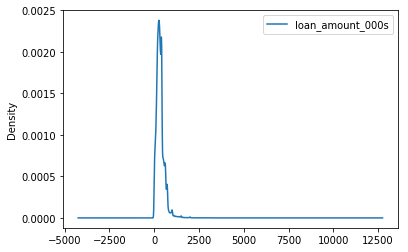

In [181]:
df[["loan_amount_000s",]].plot.hist(bins = 50, alpha = 0.5)
df[["loan_amount_000s",]].plot.kde()

Implication: Outliers exist, need to handle them.

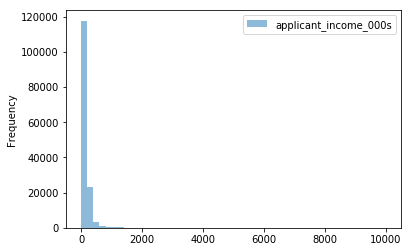

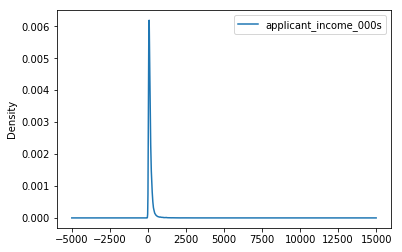

In [182]:
df[["applicant_income_000s",]].plot.hist(bins = 50, alpha = 0.5)
df[["applicant_income_000s",]].plot.kde()

**Implication**: We can see from the annual income distribution above that most borrowers have an annual income below 2000 thousands, which is reasonable.
But we have someone who **claimed** to have an annual income of 15000 thousands , which is very likely to be a fake information. 
**Need to clean this data and remove outliers.**

In [183]:
income = df['applicant_income_000s']
income = income.dropna()
income = np.array(income)
income

array([ 65., 325.,  70., ..., 260.,  95., 138.])

{'whiskers': [<matplotlib.lines.Line2D at 0x297219b1e48>,
 'caps': [<matplotlib.lines.Line2D at 0x297219bc748>,
 'boxes': [<matplotlib.lines.Line2D at 0x297219b1cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x297219bcf98>],
 'fliers': [<matplotlib.lines.Line2D at 0x297220d4400>],
 'means': []}

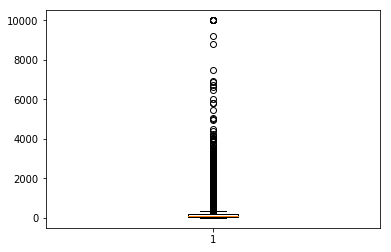

In [184]:
plt.boxplot(income)

{'whiskers': [<matplotlib.lines.Line2D at 0x29722ebb400>,
 'caps': [<matplotlib.lines.Line2D at 0x29722ebbcc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29722ebb2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x29722ec4550>],
 'fliers': [],
 'means': []}

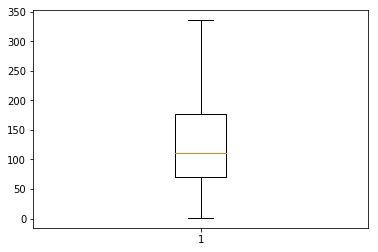

In [185]:
plt.boxplot(income, showfliers=False)

### (2) Categorical Features' Frequency

([<matplotlib.axis.XTick at 0x297246f6390>,
 <a list of 8 Text xticklabel objects>)

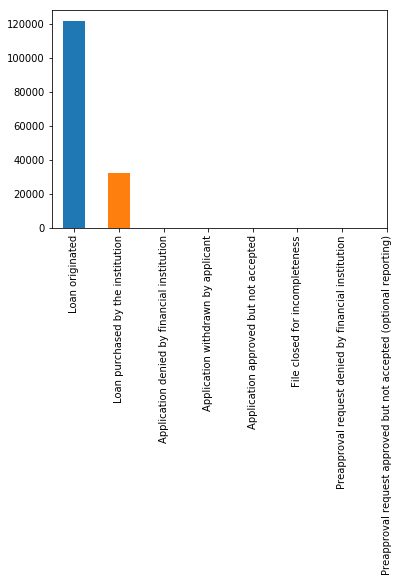

In [186]:
plt.rcParams['font.size'] = 10.0
df["action_taken"].value_counts().plot(kind = 'bar')
plt.xticks(np.arange(8), ["Loan originated", "Loan purchased by the institution","Application denied by financial institution", "Application withdrawn by applicant", "Application approved but not accepted", "File closed for incompleteness","Preapproval request denied by financial institution",'Preapproval request approved but not accepted (optional reporting)'],rotation="vertical")

Text(0,0.5,'Number of applicants')

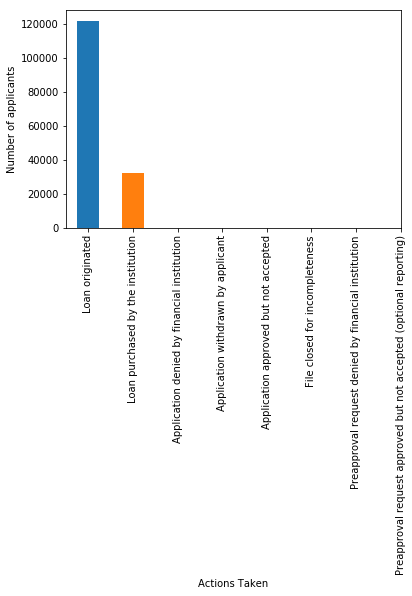

In [187]:
df["action_taken"].value_counts().plot(kind = 'bar')
plt.xticks(np.arange(8), ["Loan originated", "Loan purchased by the institution","Application denied by financial institution", "Application withdrawn by applicant", "Application approved but not accepted", "File closed for incompleteness","Preapproval request denied by financial institution",'Preapproval request approved but not accepted (optional reporting)'],rotation="vertical")
plt.xlabel("Actions Taken")
plt.ylabel("Number of applicants")

Text(0,0.5,'Number of applicants')

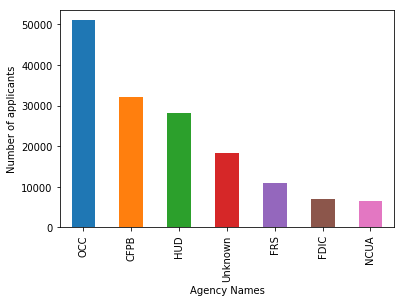

In [188]:
df["agency_code"].value_counts().plot(kind = 'bar')
plt.xticks(np.arange(7), ["OCC", "CFPB", "HUD", "Unknown", "FRS","FDIC","NCUA"])
plt.xlabel("Agency Names")
plt.ylabel("Number of applicants")

Text(0,0.5,'Number of applicants')

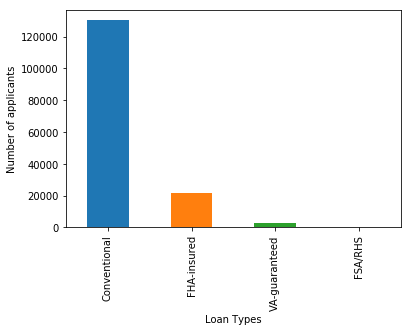

In [189]:
df['loan_type'].value_counts().plot(kind = 'bar')
plt.xticks(np.arange(4), ["Conventional", "FHA-insured", "VA-guaranteed", "FSA/RHS"])
plt.xlabel("Loan Types")
plt.ylabel("Number of applicants")

Text(0,0.5,'Number of applicants')

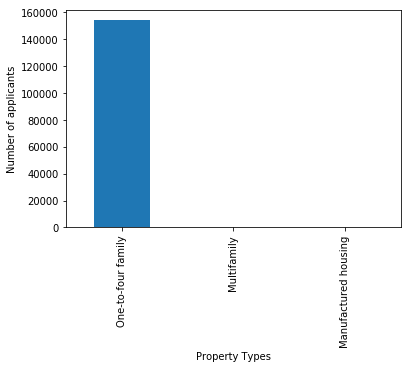

In [190]:
df["property_type"].value_counts().plot(kind = 'bar')
plt.xticks(np.arange(3), ["One-to-four family", "Multifamily", "Manufactured housing"])
plt.xlabel("Property Types")
plt.ylabel("Number of applicants")

Text(0,0.5,'Number of applicants')

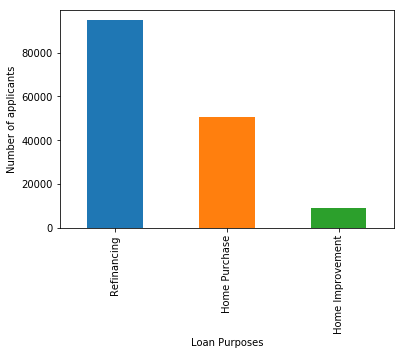

In [191]:
df["loan_purpose"].value_counts().plot(kind = 'bar')
plt.xticks(np.arange(3), ["Refinancing", "Home Purchase", "Home Improvement"])
plt.xlabel("Loan Purposes")
plt.ylabel("Number of applicants")

Text(0,0.5,'Number of applicants')

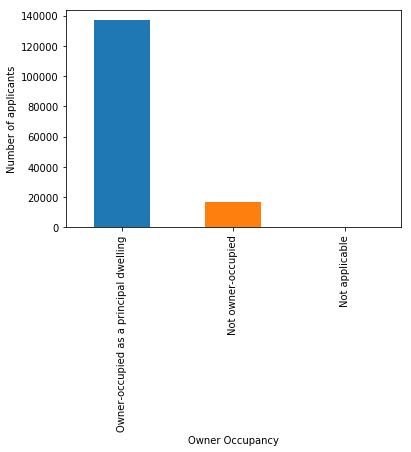

In [192]:
df["owner_occupancy"].value_counts().plot(kind = 'bar')
plt.xticks(np.arange(3), ["Owner-occupied as a principal dwelling", "Not owner-occupied", "Not applicable"],rotation="vertical")
plt.xlabel("Owner Occupancy")
plt.ylabel("Number of applicants")

Text(0,0.5,'Number of applicants')

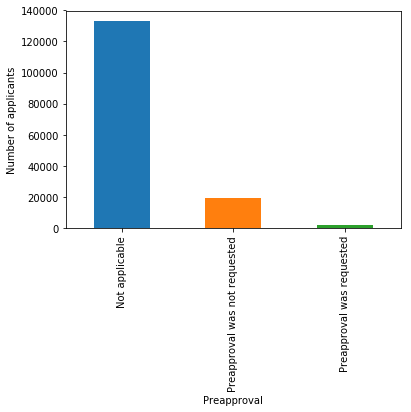

In [193]:
df["preapproval"].value_counts().plot(kind = 'bar')
plt.xticks(np.arange(3), ["Not applicable", "Preapproval was not requested", "Preapproval was requested"],rotation="vertical")
plt.xlabel("Preapproval")
plt.ylabel("Number of applicants")

Text(0,0.5,'Number of applicants')

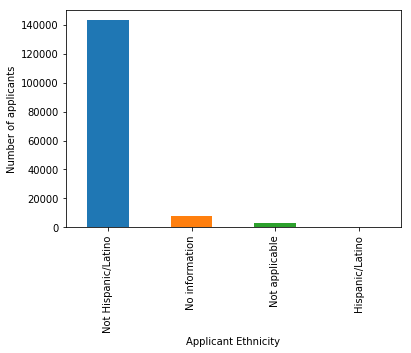

In [194]:
df["applicant_ethnicity"].value_counts().plot(kind = 'bar')
plt.xticks(np.arange(4), ["Not Hispanic/Latino", "No information", "Not applicable", "Hispanic/Latino"],rotation="vertical")
plt.xlabel("Applicant Ethnicity")
plt.ylabel("Number of applicants")

Text(0,0.5,'Number of applicants')

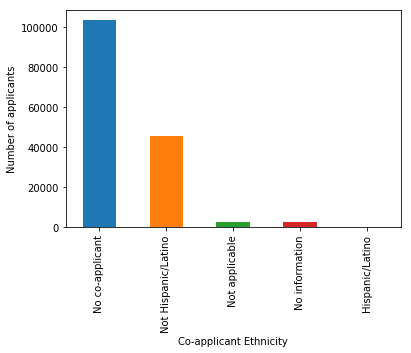

In [195]:
df["co_applicant_ethnicity"].value_counts().plot(kind = 'bar')
plt.xticks(np.arange(5), ["No co-applicant", "Not Hispanic/Latino", "Not applicable", "No information", "Hispanic/Latino"],rotation="vertical")
plt.xlabel("Co-applicant Ethnicity")
plt.ylabel("Number of applicants")

Text(0,0.5,'Number of applicants')

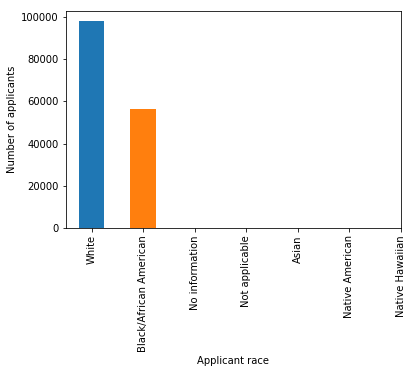

In [196]:
df["applicant_race_1"].value_counts().plot(kind = 'bar')
plt.xticks(np.arange(7), ["White", "Black/African American", "No information", "Not applicable", "Asian", "Native American", "Native Hawaiian"],rotation="vertical")
plt.xlabel("Applicant race")
plt.ylabel("Number of applicants")

Text(0,0.5,'Number of applicants')

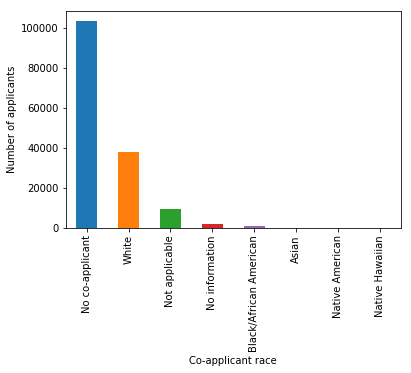

In [197]:
df["co_applicant_race_1"].value_counts().plot(kind = 'bar')
plt.xticks(np.arange(8), ["No co-applicant", "White",  "Not applicable", "No information","Black/African American",  "Asian", "Native American", "Native Hawaiian"],rotation="vertical")
plt.xlabel("Co-applicant race")
plt.ylabel("Number of applicants")

Text(0,0.5,'Number of applicants')

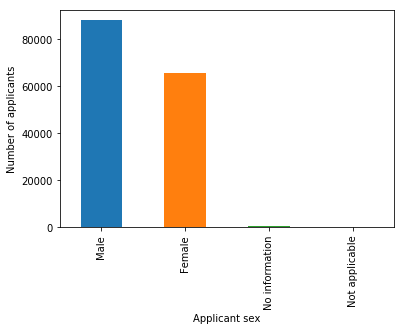

In [198]:
df["applicant_sex"].value_counts().plot(kind = 'bar')
plt.xticks(np.arange(4), ["Male", "Female", "No information", "Not applicable"])
plt.xlabel("Applicant sex")
plt.ylabel("Number of applicants")

Text(0,0.5,'Number of applicants')

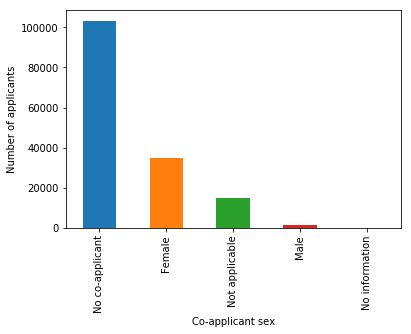

In [199]:
df["co_applicant_sex"].value_counts().plot(kind = 'bar')
plt.xticks(np.arange(5), ["No co-applicant", "Female", "Not applicable", "Male", "No information"])
plt.xlabel("Co-applicant sex")
plt.ylabel("Number of applicants")

Text(0,0.5,'Number of applicants')

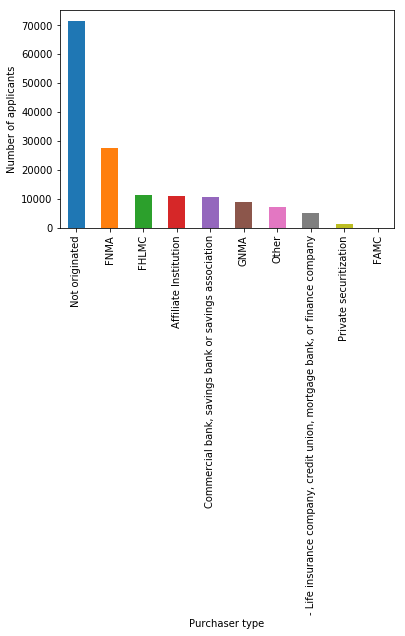

In [200]:
df["purchaser_type"].value_counts().plot(kind = 'bar')
plt.xticks(np.arange(10), ["Not originated", "FNMA", "FHLMC", "Affiliate Institution",
                          "Commercial bank, savings bank or savings association",
                          "GNMA", "Other", "- Life insurance company, credit union, mortgage bank, or finance company",
                          "Private securitization", "FAMC"], rotation="vertical")
plt.xlabel("Purchaser type")
plt.ylabel("Number of applicants")

**Implication**: From the above graphs, we see that most categorical features have very distinct distributions.

## 3. Data Preprocessing —— Part 2

### (1) Results got from data visualization

Before doing all the data cleaning work, we want to make a copy of the dataframe.

In [98]:
df_copy = df
print(df_copy.columns)

Index(['action_taken', 'as_of_year', 'agency_code', 'loan_type',
       'property_type', 'loan_purpose', 'owner_occupancy', 'loan_amount_000s',
       'preapproval', 'applicant_ethnicity', 'co_applicant_ethnicity',
       'applicant_race_1', 'co_applicant_race_1', 'applicant_sex',
       'co_applicant_sex', 'applicant_income_000s', 'purchaser_type'],
      dtype='object')


In [99]:
df = df_copy

### (2) Handling missing value

In [100]:
#count the missing values
df.isnull().sum()

action_taken                 0
as_of_year                   0
agency_code                  0
loan_type                    0
property_type                0
loan_purpose                 0
owner_occupancy              0
loan_amount_000s             0
preapproval                  0
applicant_ethnicity          0
co_applicant_ethnicity       0
applicant_race_1             0
co_applicant_race_1          0
applicant_sex                0
co_applicant_sex             0
applicant_income_000s     7517
purchaser_type               0
dtype: int64

We have 1 features which contain missing values, which is the applicant income number. We fill it in with the median income in the data set.

In [101]:
df.loc[:,"applicant_income_000s"].median()

111.0

In [102]:
values = {'applicant_income_000s': 112}
df = df.fillna(value=values)
df.isnull().sum()

action_taken              0
as_of_year                0
agency_code               0
loan_type                 0
property_type             0
loan_purpose              0
owner_occupancy           0
loan_amount_000s          0
preapproval               0
applicant_ethnicity       0
co_applicant_ethnicity    0
applicant_race_1          0
co_applicant_race_1       0
applicant_sex             0
co_applicant_sex          0
applicant_income_000s     0
purchaser_type            0
dtype: int64

### (3) Creating dummies

In [103]:
df.columns

Index(['action_taken', 'as_of_year', 'agency_code', 'loan_type',
       'property_type', 'loan_purpose', 'owner_occupancy', 'loan_amount_000s',
       'preapproval', 'applicant_ethnicity', 'co_applicant_ethnicity',
       'applicant_race_1', 'co_applicant_race_1', 'applicant_sex',
       'co_applicant_sex', 'applicant_income_000s', 'purchaser_type'],
      dtype='object')

In [104]:
df = pd.concat([df, pd.get_dummies(df['agency_code'], prefix = 'agent',drop_first=True)], axis=1); df
df = pd.concat([df, pd.get_dummies(df['as_of_year'],drop_first=True)], axis=1); df
df = pd.concat([df, pd.get_dummies(df['loan_type'],prefix = 'loan_type',drop_first=True)], axis=1); df
df = pd.concat([df, pd.get_dummies(df['property_type'],prefix = 'pro_type',drop_first=True)], axis=1); df
df = pd.concat([df, pd.get_dummies(df['loan_purpose'],prefix = 'loan_pur',drop_first=True)], axis=1); df
df = pd.concat([df, pd.get_dummies(df['owner_occupancy'],prefix = 'owner',drop_first=True)], axis=1); df
df = pd.concat([df, pd.get_dummies(df['preapproval'],prefix = 'pre',drop_first=True)], axis=1); df
df = pd.concat([df, pd.get_dummies(df['applicant_ethnicity'],prefix = 'ethnicity',drop_first=True)], axis=1); df
df = pd.concat([df, pd.get_dummies(df['co_applicant_ethnicity'],prefix = 'co_ethnicity',drop_first=True)], axis=1); df
df = pd.concat([df, pd.get_dummies(df['applicant_race_1'],prefix = 'race',drop_first=True)], axis=1); df
df = pd.concat([df, pd.get_dummies(df['co_applicant_race_1'],prefix = 'co_race',drop_first=True)], axis=1); df
df = pd.concat([df, pd.get_dummies(df['applicant_sex'],prefix = 'sex',drop_first=True)], axis=1); df
df = pd.concat([df, pd.get_dummies(df['co_applicant_sex'],prefix = 'co_sex',drop_first=True)], axis=1); df
df = pd.concat([df, pd.get_dummies(df['purchaser_type'],prefix = 'purchaser',drop_first=True)], axis=1); df
df.head()

,action_taken,as_of_year,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,applicant_ethnicity,...,co_sex_5,purchaser_1,purchaser_2,purchaser_3,purchaser_4,purchaser_5,purchaser_6,purchaser_7,purchaser_8,purchaser_9
1,1,2007,2,1,1,1,1,416,2,2,...,1,0,0,0,0,0,0,1,0,0
2,1,2007,7,1,1,3,1,340,3,2,...,1,0,0,0,0,0,0,0,1,0
3,1,2007,2,1,1,1,1,200,2,2,...,1,0,0,0,0,0,0,1,0,0
4,1,2007,2,1,1,1,2,71,2,2,...,0,0,0,0,0,0,0,0,0,0
5,1,2007,2,1,1,1,1,920,2,1,...,1,0,0,0,0,0,0,1,0,0


In [105]:
df.columns

Index([          'action_taken',             'as_of_year',
                  'agency_code',              'loan_type',
                'property_type',           'loan_purpose',
              'owner_occupancy',       'loan_amount_000s',
                  'preapproval',    'applicant_ethnicity',
       'co_applicant_ethnicity',       'applicant_race_1',
          'co_applicant_race_1',          'applicant_sex',
             'co_applicant_sex',  'applicant_income_000s',
               'purchaser_type',                'agent_2',
                      'agent_3',                'agent_4',
                      'agent_5',                'agent_7',
                      'agent_9',                     2008,
                           2009,                     2010,
                           2011,                     2012,
                  'loan_type_2',            'loan_type_3',
                  'loan_type_4',             'pro_type_2',
                   'pro_type_3',             'loan_pur_2

### (4) Handling outliers

We now drop some of the outliers which have been identified from the data visualization part. We will drop those observations which are 3 standard deviations above the mean. Mean and SD haven been calculated in csv beforehand. **Note that dropping too many outliers could reduce the predictive power of our model.**

In [106]:
#Make a copy of the original dataset
df2 = copy.deepcopy(df)

In [107]:
#Convert df to the original version
df =df2

In [108]:
print("Shape before: ", df.shape)
df = df[df['applicant_income_000s'] < 1000]
# Check shape again to confirm
print("Shape after: ", df.shape)

Shape before:  (154254, 70)
Shape after:  (153222, 70)


In [109]:
print("Shape before: ", df.shape)
df = df[df['loan_amount_000s'] < 2000]
# Check shape again to confirm
print("Shape after: ", df.shape)

Shape before:  (153222, 70)
Shape after:  (153050, 70)


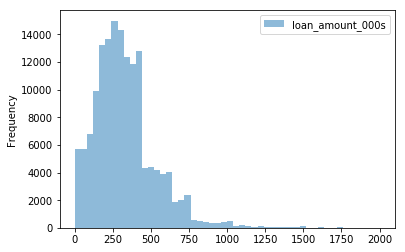

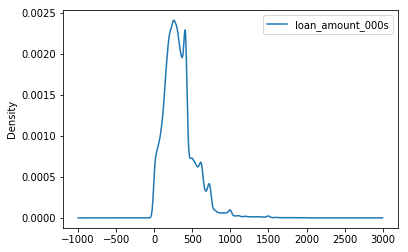

In [213]:
df[["loan_amount_000s",]].plot.hist(bins = 50, alpha = 0.5)
df[["loan_amount_000s",]].plot.kde()

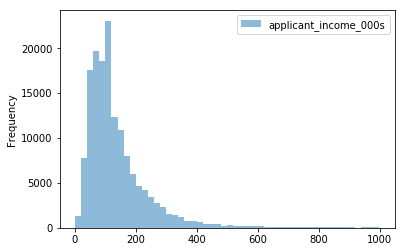

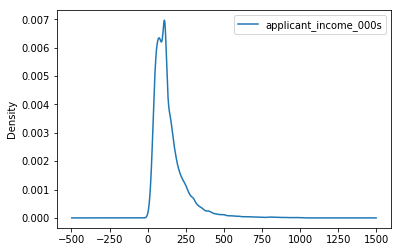

In [214]:
df[["applicant_income_000s",]].plot.hist(bins = 50, alpha = 0.5)
df[["applicant_income_000s",]].plot.kde()

### (5) Merge classes

In [110]:
df['action_taken'].value_counts()

1    120919
0     32131
Name: action_taken, dtype: int64

In [111]:
#df['action_taken'] = df['action_taken'].astype('category')
#df.columns

In [112]:
Y = df['action_taken']
X = df.drop(columns = ['as_of_year','action_taken','agency_code','loan_type','property_type','loan_purpose','owner_occupancy','preapproval','applicant_ethnicity','co_applicant_ethnicity','applicant_sex','co_applicant_sex','applicant_race_1','co_applicant_race_1','purchaser_type'])
X.shape

(153050, 55)

In [113]:
Y

1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
11       1
12       1
13       1
15       1
16       0
17       1
18       1
19       1
20       1
22       0
23       1
24       1
25       1
27       1
30       1
31       1
32       1
33       1
34       0
36       1
39       1
        ..
48495    1
48501    1
48503    1
48505    1
48521    1
48527    1
48543    1
48545    1
48553    1
48555    1
48561    1
48563    1
48565    1
48566    0
48568    0
48570    0
48571    1
48572    0
48574    0
48575    1
48576    0
48577    1
48578    1
48580    1
48585    1
48587    1
48589    1
48591    1
48595    1
48614    0
Name: action_taken, Length: 153050, dtype: int64

In [114]:
X

,loan_amount_000s,applicant_income_000s,agent_2,agent_3,agent_4,agent_5,agent_7,agent_9,2008,2009,...,co_sex_5,purchaser_1,purchaser_2,purchaser_3,purchaser_4,purchaser_5,purchaser_6,purchaser_7,purchaser_8,purchaser_9
1,416,112.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,340,65.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,200,112.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,71,325.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,920,112.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6,401,70.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7,95,112.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8,399,23.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,379,112.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
11,127,112.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [179]:
X.columns

Index([     'loan_amount_000s', 'applicant_income_000s',
                     'agent_2',               'agent_3',
                     'agent_4',               'agent_5',
                     'agent_7',               'agent_9',
                          2008,                    2009,
                          2010,                    2011,
                          2012,           'loan_type_2',
                 'loan_type_3',           'loan_type_4',
                  'pro_type_2',            'pro_type_3',
                  'loan_pur_2',            'loan_pur_3',
                     'owner_2',               'owner_3',
                       'pre_2',                 'pre_3',
                 'ethnicity_2',           'ethnicity_3',
                 'ethnicity_4',        'co_ethnicity_2',
              'co_ethnicity_3',        'co_ethnicity_4',
              'co_ethnicity_5',                'race_5',
                   'co_race_2',             'co_race_3',
                   'co_race_4',

### (6) Resampling the data 

In [115]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [116]:
print(sorted(Counter(Y).items()))

[(0, 32131), (1, 120919)]


In [117]:
rus = RandomUnderSampler(random_state=0)
X_res, y_res = rus.fit_resample(X, Y)

In [118]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 32131, 1: 32131})


###  (7) Train-test split

We now split the training and testing data. In order to make the future adjustment more convenient, we fixed the random state.

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state= 1)
X_train.shape

(44983, 55)

In [120]:
Y_train

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [121]:
count_number = pd.value_counts(pd.Series(Y_train))
count_number

1    22643
0    22340
dtype: int64

In [122]:
count_number = pd.value_counts(pd.Series(Y_test))
count_number

0    9791
1    9488
dtype: int64

In [199]:
count_number = pd.value_counts(pd.Series(X_train[: , 31]))
count_number

1.0    25280
0.0    19703
dtype: int64

In [187]:
X_test[: , 0]

array([230., 209., 230., ...,  75., 236., 200.])

## 4. Model Implementaion

There are many classification models in sklearn for us to choose from. In this project, we will use the following models and then compare their results. Note that all the models are implemented through cross-validation. Moreover, we use Grid Search for all the algorithms in order to tune the parameters.

- Multiclass Logistic Regression
- Multiclass KNN
- Random Forest
- Decision Tree
- Support Vector Machine

### (1) Normalize the data and import relevant packages

Before implementing the machine learning algorithms, we need to normalize the data. Here we used MinMaxScaler to do the job.

In [123]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, KFold

from sklearn.metrics import confusion_matrix, classification_report

In [124]:
robust = MinMaxScaler().fit(X_res)
x_train_nor = robust.transform(X_train)
x_test_nor = robust.transform(X_test)
print(x_train_nor)

[[0.14371557 0.10921844 0.         ... 0.         0.         0.        ]
 [0.03355033 0.09018036 0.         ... 0.         0.         0.        ]
 [0.14621933 0.11122244 0.         ... 0.         0.         0.        ]
 ...
 [0.12669004 0.11122244 0.         ... 0.         0.         0.        ]
 [0.23985979 0.18937876 0.         ... 0.         0.         0.        ]
 [0.05908863 0.04008016 0.         ... 0.         0.         0.        ]]


In [125]:
x_train_nor.shape

(44983, 55)

In [126]:
Y_test.shape

(19279,)

In [127]:
print(Y_train, Y_test)

[1 0 1 ... 0 1 1] [0 1 0 ... 0 1 1]


### (2) Show the distribution of classes and find the baseline score for classification models

In [128]:
count_number = pd.value_counts(pd.Series(Y_test))
count_number

0    9791
1    9488
dtype: int64

### (3) Logistic Regression

Logistic Regression is one of the fundamental classification methods. It is often used for binary classifications since Sigmoid function gives probability of the two classes between 0 and 1. In this model, we tuned the parameter "C", which is the inverse of regularization strength.

**Characteristic:** Logistic Regression is designed to be a very efficient algorithm so it computes very fast. But in some cases, since logistic regression is a simple algorithm, its accuracy may be lower compare to other complex algorithms.

In [133]:
from sklearn.linear_model import LogisticRegression
 
lg = LogisticRegression(random_state = 0, multi_class  = "ovr",max_iter = 1000)
param_grid0 = {'C': [0.01,0.1, 1,10], 'solver': ['saga']}

grid_search0 = GridSearchCV(lg, param_grid = param_grid0, scoring='accuracy', cv=5, return_train_score=True)

grid_search0.fit(x_train_nor, Y_train.ravel()) 

print("Scores on training set:")
means = grid_search0.cv_results_['mean_test_score']
stds = grid_search0.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search0.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Scores on training set:
0.850 (+/-0.006) for {'C': 0.01, 'solver': 'saga'}
0.855 (+/-0.004) for {'C': 0.1, 'solver': 'saga'}
0.855 (+/-0.005) for {'C': 1, 'solver': 'saga'}
0.855 (+/-0.005) for {'C': 10, 'solver': 'saga'}


In [134]:
print(grid_search0.best_params_)

{'C': 10, 'solver': 'saga'}


In [135]:
Logistic_Reg = grid_search0.best_estimator_.fit(x_train_nor, Y_train)
y_hat = Logistic_Reg.predict(x_test_nor)
Logistic_Regression_score =Logistic_Reg.score(x_test_nor, Y_test)
print("Logistic Regression Score on Testing set: ", end='')
print(Logistic_Regression_score)

Logistic Regression Score on Testing set: 0.8530006743088334


Training and Testing sets have very close accuracy scores.

In [136]:
confusion_log_regr = confusion_matrix(Y_test, y_hat)
confusion_log_regr

array([[9414,  377],
       [2457, 7031]], dtype=int64)

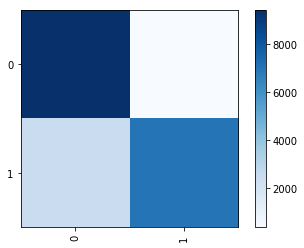

In [137]:
columns = ['0', '1']

plt.imshow(confusion_log_regr, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,], columns, rotation='vertical')
plt.yticks([0,1,], columns)
plt.colorbar()

plt.show()

In [138]:
print(classification_report(Y_test, y_hat))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      9791
           1       0.95      0.74      0.83      9488

   micro avg       0.85      0.85      0.85     19279
   macro avg       0.87      0.85      0.85     19279
weighted avg       0.87      0.85      0.85     19279



In [139]:
from sklearn.linear_model import LogisticRegression
 
lg = LogisticRegression(penalty = 'l1', random_state = 0, multi_class  = "ovr",max_iter = 1000)
param_grid0 = {'C': [0.01,0.1, 1,10], 'solver': ['saga']}

grid_search01 = GridSearchCV(lg, param_grid = param_grid0, scoring='accuracy', cv=5, return_train_score=True)

grid_search01.fit(x_train_nor, Y_train.ravel()) 

print("Scores on training set:")
means = grid_search01.cv_results_['mean_test_score']
stds = grid_search01.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search01.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Scores on training set:
0.845 (+/-0.004) for {'C': 0.01, 'solver': 'saga'}
0.853 (+/-0.005) for {'C': 0.1, 'solver': 'saga'}
0.855 (+/-0.005) for {'C': 1, 'solver': 'saga'}
0.855 (+/-0.005) for {'C': 10, 'solver': 'saga'}


In [ ]:
print(grid_search01.best_params_)

In [ ]:
Logistic_Reg01 = grid_search01.best_estimator_.fit(x_train_nor, Y_train)
y_hat01 = Logistic_Reg01.predict(x_test_nor)
Logistic_Regression_score =Logistic_Reg01.score(x_test_nor, Y_test)
print("Logistic Regression Score on Testing set: ", end='')
print(Logistic_Regression_score)

In [ ]:
confusion_log_regr01 = confusion_matrix(Y_test, y_hat01)
confusion_log_regr01

In [ ]:
columns = ['0', '1']

plt.imshow(confusion_log_regr01, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,], columns, rotation='vertical')
plt.yticks([0,1,], columns)
plt.colorbar()

plt.show()

In [ ]:
print(classification_report(Y_test, y_hat01))

**Comment:** Logistic Regression shows good overall performance. This may be because that Logistic Regression is very easy to tune the parameters. Also, sometimes a simple model can fit the data well.

### (4) KNeighborsClassifier

KNN algorithm basically classifies data by finding the K nearest data points to it measured by a distance function. Then it assigns to the class which is the  most common among its K nearest neighbors.

**Characteristic:** KNN works on similarity measures. The accuracy of the model depends greatly on the data itself (KNN is very sensitive to the noises). Finding a good "K" is not very easy and large N requires a lot of calculations. KNN takes a very long time to compute with grid search.

In [140]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

parameters = {
    'n_neighbors': [1, 9, 31],    #odd number works better in KNN
}

grid_search = GridSearchCV(model, param_grid = parameters, scoring='accuracy', cv=5, return_train_score=True)

grid_search.fit(x_train_nor, Y_train.ravel()) 


print("Scores on training set:")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))


print(grid_search.cv_results_) 
print(grid_search.best_params_)

Scores on training set:
0.783 (+/-0.011) for {'n_neighbors': 1}
0.814 (+/-0.008) for {'n_neighbors': 9}
0.802 (+/-0.010) for {'n_neighbors': 31}
{'mean_fit_time': array([4.90961132, 4.71885533, 4.36514783]), 'std_fit_time': array([0.43941797, 0.27818292, 0.93785359]), 'mean_score_time': array([25.14754925, 33.89701695, 38.6802887 ]), 'std_score_time': array([0.4976873 , 0.19934069, 3.05413912]), 'param_n_neighbors': masked_array(data=[1, 9, 31],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 9}, {'n_neighbors': 31}], 'split0_test_score': array([0.78203846, 0.8068245 , 0.79848839]), 'split1_test_score': array([0.77981549, 0.81660554, 0.80771368]), 'split2_test_score': array([0.77592531, 0.81482716, 0.79582083]), 'split3_test_score': array([0.79201867, 0.81736327, 0.80758115]), 'split4_test_score': array([0.78279235, 0.81580703, 0.8023566 ]), 'mean_test_score': array([0.78251784, 0.8142854 , 0.8023

Here we can see that increasing K gave us better results. However, it also increases the time of computation. Due to the limited time we have, we will not keep trying larger Ks.

In [141]:
KNN = grid_search.best_estimator_.fit(x_train_nor, Y_train)
y_hat2 = KNN.predict(x_test_nor)
KNN_score = KNN.score(x_test_nor, Y_test)

print("KNN Score on Testing set: ", end='')
print(KNN_score)

KNN Score on Testing set: 0.8133201929560662


The testing and training sets have very close scores. There is some space for improvement.

In [142]:
confusion_KNN = confusion_matrix(Y_test, y_hat2)
confusion_KNN

array([[8904,  887],
       [2712, 6776]], dtype=int64)

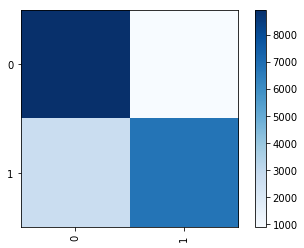

In [143]:
columns = ['0', '1']

plt.imshow(confusion_KNN, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,], columns, rotation='vertical')
plt.yticks([0,1,], columns)
plt.colorbar()

plt.show()

In [144]:
print(classification_report(Y_test, y_hat2))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      9791
           1       0.88      0.71      0.79      9488

   micro avg       0.81      0.81      0.81     19279
   macro avg       0.83      0.81      0.81     19279
weighted avg       0.82      0.81      0.81     19279



**Comment:** KNN didn't work very well here. We mentioned above that KNN depends heavily on the data itself and is very sensitive to noises of the data. Finding a good K is not easy. Due to the limited time of this project, we will not keep trying different Ks.

### (5) Random Forest

**Characteristic:** Random forest is a more advanced model. It is a bagging model. In general, good accuracy can be achieved by this model. But it also involves a lot of calculations and Random Forest can easily result in overfitting due to its high complexity. Also, tuning the parameters of Random Forest is not very easy (choosing a good n_estimators).

Here we tuned the parameters by changing the search range of n_estimators. We also changed the max_depth in order deal with the problem of overfitting. In general, having more number of trees will increase the accuracy of the model, but it will take more time to compute. Therefore, we will not keep testing models with more number of trees. (In real life, there is also a cost for longer time of computation.)

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Random Forest Regressor object
rf = RandomForestClassifier(random_state = 10)


param_grid = {"criterion": ['entropy','gini'],"n_estimators": [10,50, 100, 300, 500], "max_depth":[10, 20]}

grid_search2 = GridSearchCV(rf, param_grid=param_grid, scoring='accuracy', cv=5, return_train_score = True)
grid_search2.fit(x_train_nor, Y_train.ravel()) 


print("Scores on training set:")
means = grid_search2.cv_results_['mean_test_score']
stds = grid_search2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print(grid_search2.best_params_)

Scores on training set:
0.835 (+/-0.016) for {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 10}
0.847 (+/-0.013) for {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}
0.846 (+/-0.012) for {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}
0.845 (+/-0.011) for {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 300}
0.845 (+/-0.010) for {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 500}
0.854 (+/-0.006) for {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 10}
0.858 (+/-0.006) for {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 50}
0.858 (+/-0.007) for {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}
0.858 (+/-0.006) for {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 300}
0.858 (+/-0.006) for {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 500}
0.835 (+/-0.011) for {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 10}
0.844 (+/-0.012) for {'criterion': 'gini', 'max_depth': 10, 

In [146]:
print(grid_search2.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 300}


From the above result, we could see that with more trees, the results will become better. We can also get better results if we allow the maximum depth to become larger. But all of these will result in longer computation time. We will not keep trying larger number of trees due to time constraint.

In [147]:
Random_forest = grid_search2.best_estimator_.fit(x_train_nor, Y_train)
y_hat3 = Random_forest.predict(x_test_nor)
Random_forest_score = Random_forest.score(x_test_nor, Y_test)
print("Random Forest Scores on Testing set: ", end='')
print(Random_forest_score)

Random Forest Scores on Testing set: 0.8579283157840137


We can see that our training and testing sets have the similar scores. 

In [148]:
print(grid_search2.cv_results_)

{'mean_fit_time': array([ 0.33528047,  1.3968473 ,  2.91536727,  8.09958735, 13.83124428,
        0.45173812,  2.28926053,  4.09798055, 12.41380014, 21.2902472 ,
        0.27295547,  1.47110939,  2.67467508,  8.23007979, 13.01818871,
        0.45202918,  1.96543298,  3.88916197, 11.71096177, 19.80265675]), 'std_fit_time': array([0.03295395, 0.02965135, 0.32795574, 0.28426449, 0.51301297,
       0.0525638 , 0.15507475, 0.21439772, 0.13038362, 1.3966114 ,
       0.00728352, 0.1224984 , 0.17028601, 0.28080307, 0.46473508,
       0.02125704, 0.04072961, 0.26604432, 0.44386347, 0.42122451]), 'mean_score_time': array([0.0207427 , 0.06102653, 0.1177588 , 0.32836084, 0.61249638,
       0.02030673, 0.09489255, 0.17163525, 0.55179548, 0.93470502,
       0.01515913, 0.06399608, 0.11430402, 0.37928877, 0.55295916,
       0.02423873, 0.09026456, 0.18712239, 0.57241473, 0.94103513]), 'std_score_time': array([0.010653  , 0.00791406, 0.01328586, 0.00798847, 0.07717338,
       0.00249595, 0.00739111, 0

In [149]:
confusion_rf = confusion_matrix(Y_test, y_hat3)
confusion_rf

array([[9399,  392],
       [2347, 7141]], dtype=int64)

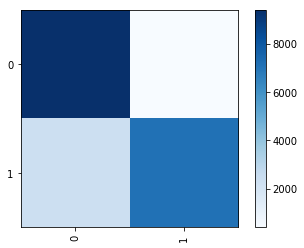

In [150]:
columns = ['0', '1']

plt.imshow(confusion_rf, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,], columns, rotation='vertical')
plt.yticks([0,1,], columns)
plt.colorbar()

plt.show()

In [151]:
print(classification_report(Y_test, y_hat3))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      9791
           1       0.95      0.75      0.84      9488

   micro avg       0.86      0.86      0.86     19279
   macro avg       0.87      0.86      0.86     19279
weighted avg       0.87      0.86      0.86     19279



**Comment:** We can see from the above results that Random Forest achieved very close score (45% accuracy) to Logistic Regression. The boundary of this problem might be this.

### (6) Desicion Tree

**Characteristic:** In order to compare with Random Forest, we also tested Decision Tree model using AdaBoostClassifier. Decision Tree is in general a good model if the input has a lot of categorical features. But tuning the parameters of decision tree is very difficult (when to cut nodes etc.).

In [152]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = AdaBoostClassifier(DecisionTreeClassifier(random_state = 1))

param_grid2 = {"base_estimator__criterion" : ["entropy","gini"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [10,30, 50,70, 100, 120]
             }

grid_search3 = GridSearchCV(tree, param_grid=param_grid2, scoring='accuracy', cv=5, return_train_score = True)
grid_search3.fit(x_train_nor, Y_train.ravel()) 

print("Scores on training set:")
means = grid_search3.cv_results_['mean_test_score']
stds = grid_search3.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search3.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print(grid_search3.best_params_)

Scores on training set:
0.804 (+/-0.046) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 10}
0.813 (+/-0.037) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 30}
0.820 (+/-0.023) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 50}
0.799 (+/-0.045) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 70}
0.811 (+/-0.044) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 100}
0.798 (+/-0.050) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'n_estimators': 120}
0.813 (+/-0.024) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'n_estimators': 10}
0.818 (+/-0.007) for {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'n_estimators': 30}
0.821 (+/-0.005) for {'bas

In [153]:
print(grid_search3.cv_results_) 

{'mean_fit_time': array([ 2.25570354,  4.59597583,  7.04150615, 10.51784582, 14.25710802,
       16.79499531,  2.46173496,  5.52070808, 10.15409985, 13.3897892 ,
       23.17973356, 25.03334651,  2.81872706,  6.98942614, 11.06024632,
       16.21863761, 22.67583432, 25.52131023,  2.2680634 ,  5.22668529,
        8.07738795, 11.86520195, 16.87804585, 19.54873095]), 'std_fit_time': array([0.25868295, 0.7689084 , 0.91245054, 2.49023914, 3.20453654,
       3.56631391, 0.36468052, 0.89742826, 1.91895941, 2.57719925,
       2.26365084, 5.91199882, 0.3049774 , 0.72440378, 1.79764552,
       2.09557242, 2.84014997, 3.44915609, 0.33328991, 0.49174629,
       0.94806622, 1.90412751, 2.13836704, 1.52001194]), 'mean_score_time': array([0.03275423, 0.0689167 , 0.11127858, 0.1619729 , 0.21607976,
       0.26786051, 0.03316169, 0.07834592, 0.14134545, 0.17009773,
       0.2713016 , 0.3080121 , 0.03208137, 0.07745953, 0.14236584,
       0.18942266, 0.23465319, 0.2756711 , 0.03157659, 0.0781055 ,
     

In [154]:
Decision_tree = grid_search3.best_estimator_.fit(x_train_nor, Y_train)
y_hat4 = Decision_tree.predict(x_test_nor)
Decision_tree_score = Decision_tree.score(x_test_nor, Y_test)
print("Decision Tree Scores on Testing set: ", end='')
print(Decision_tree_score)

Decision Tree Scores on Testing set: 0.8260801908812698


In [155]:
confusion_dt = confusion_matrix(Y_test, y_hat4)
confusion_dt

array([[8341, 1450],
       [1903, 7585]], dtype=int64)

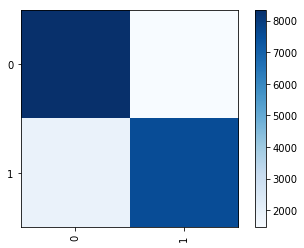

In [156]:
columns = ['0', '1']

plt.imshow(confusion_dt, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,], columns, rotation='vertical')
plt.yticks([0,1,], columns)
plt.colorbar()

plt.show()

In [157]:
print(classification_report(Y_test, y_hat4))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      9791
           1       0.84      0.80      0.82      9488

   micro avg       0.83      0.83      0.83     19279
   macro avg       0.83      0.83      0.83     19279
weighted avg       0.83      0.83      0.83     19279



**Comment:** As expected, Decision Tree performed worse than Random Forest (Random Forest is actually a bagging model of Decision Tree). It may also result from the difficulty of tuning parameters of this model (when to cut nodes or how deep should the tree go.)

### (7) Neural Network

**Characteristic:** Due to the limited time we have, we tried MLPClassifier from sklearn first. We use grid search to find the best hidden_layer_sizes and best activation function. We expect Neural Network should be a good model due to its complexity. But again, finding a good number of layers and a good number of neurons is very difficult. Here we tested the following combinations through grid search:

In [76]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
mlp = MLPClassifier(random_state=1)

param_grid3 = {"hidden_layer_sizes" : [(5,5), (10,10), (50,50),(100,100), (5,5,5),(10,10,10),(50,50,50), (5,5,5,5),(10,10,10,10)],
              "activation" :   ["logistic", "tanh",'relu'],
             }

grid_search4 = GridSearchCV(mlp, param_grid=param_grid3, scoring='accuracy', cv=5, return_train_score = True)
grid_search4.fit(x_train_nor, Y_train.ravel()) 

print(grid_search4.cv_results_) 
print(grid_search4.best_params_)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

{'mean_fit_time': array([  9.84149857,   7.51820941,  14.82748528,  22.28968329,
        27.57749591,   9.93973584,  11.41748862,  33.70551586,
        10.70738263,  22.24514561,  34.22118073,  56.95296102,
        66.57806315,  21.08007216,  38.14102497,  74.89750595,
        31.42924056,  61.28892341,  14.83964171,  31.39036655,
        64.207762  , 137.18648047,  16.63372259,  32.48075871,
       162.15169902,  36.15344257,  69.82184944]), 'std_fit_time': array([ 0.96078939,  1.0058856 ,  4.4660699 ,  6.97133989,  8.2149613 ,
        1.97822792,  3.24515905,  8.91972694,  1.64081013,  3.46822367,
        4.67632511,  3.70624843,  3.10640044,  4.5263266 ,  0.8538105 ,
        8.48308849,  6.74610585, 10.46290729,  3.72719143,  8.79693932,
       11.82683043, 26.23335281,  6.08663796, 10.16228515,  7.41886731,
        7.96789671, 12.14788066]), 'mean_score_time': array([0.00837755, 0.01057181, 0.02672844, 0.05226064, 0.005583  ,
       0.01017351, 0.03909554, 0.00658226, 0.01176825, 0

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [78]:
print(grid_search4.cv_results_['std_test_score'][grid_search4.best_index_])

0.0020393200357380127


In [79]:
Neural_network = grid_search4.best_estimator_.fit(x_train_nor, Y_train)

y_hat5 = Neural_network.predict(x_test_nor)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [80]:
Neural_network_score = Neural_network.score(x_test_nor, Y_test)
Neural_network_score

0.8570983972197728

In [81]:
confusion_nn = confusion_matrix(Y_test, y_hat5)
confusion_nn

array([[9160,  631],
       [2124, 7364]], dtype=int64)

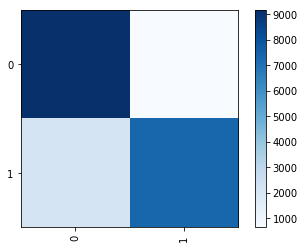

In [82]:
columns = ['0', '1']

plt.imshow(confusion_nn, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,], columns, rotation='vertical')
plt.yticks([0,1,], columns)
plt.colorbar()

plt.show()

In [83]:
print(classification_report(Y_test, y_hat5))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      9791
           1       0.92      0.78      0.84      9488

   micro avg       0.86      0.86      0.86     19279
   macro avg       0.87      0.86      0.86     19279
weighted avg       0.87      0.86      0.86     19279



**Comment:** As expected, Neural Network achieved the best score right now (even though it is a small improvement over Logistic Regression.)

### (8) Support Vector Machine

**Characteristic:** SVM constructs a hyperplane or a set of hyperplanes which separate the nearest data points of different classes by the largest distance. SVM should be a good model in our problem. It is a very powerful model when the classes are gathered together, which can not be dealt with well by Logistic Regression. Disadvantages of SVM are that it also computes very slowly and choosing a good C is not very easy.

In [158]:
from sklearn.svm import SVC

In [159]:
svm= SVC(kernel = "rbf", decision_function_shape = 'ovo')

param_grid4 = {"C":[1, 10],
               "gamma" : [0.1, 1],
             }

grid_search5 = GridSearchCV(svm, param_grid=param_grid4, scoring='accuracy', cv=5, return_train_score = True)
grid_search5.fit(x_train_nor, Y_train.ravel()) 

print(grid_search5.cv_results_) 
print(grid_search5.best_params_)

{'mean_fit_time': array([103.89137626, 405.8483748 , 165.81411719, 538.34915586]), 'std_fit_time': array([ 5.4399534 ,  7.28599174,  3.06421756, 80.36534061]), 'mean_score_time': array([11.59124956, 17.79851532, 12.77642345, 17.02606349]), 'std_score_time': array([1.00364056, 0.40918171, 0.76627583, 2.87016245]), 'param_C': masked_array(data=[1, 1, 10, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.1, 1, 0.1, 1],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'gamma': 0.1}, {'C': 1, 'gamma': 1}, {'C': 10, 'gamma': 0.1}, {'C': 10, 'gamma': 1}], 'split0_test_score': array([0.84861621, 0.85061687, 0.85328443, 0.84739358]), 'split1_test_score': array([0.85161721, 0.85395132, 0.85706347, 0.85017228]), 'split2_test_score': array([0.85250639, 0.84717128, 0.85550739, 0.84216961]), 'split3_test_score': array([0.85426856, 0.85371276, 0

In [160]:
print(grid_search5.cv_results_['std_test_score'][grid_search5.best_index_])

0.0023408243142532398


In [161]:
SVM= grid_search5.best_estimator_.fit(x_train_nor, Y_train)

y_hat6 = SVM.predict(x_test_nor)

In [162]:
svm_score = SVM.score(x_test_nor, Y_test)
svm_score

0.8556979096426163

In [163]:
confusion_svm = confusion_matrix(Y_test, y_hat6)
confusion_svm

array([[9395,  396],
       [2386, 7102]], dtype=int64)

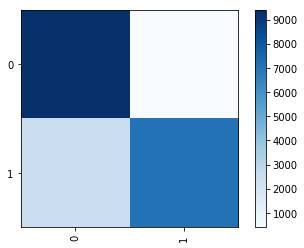

In [164]:
columns = ['0', '1']

plt.imshow(confusion_svm, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,], columns, rotation='vertical')
plt.yticks([0,1,], columns)
plt.colorbar()

plt.show()

In [165]:
print(classification_report(Y_test, y_hat6))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      9791
           1       0.95      0.75      0.84      9488

   micro avg       0.86      0.86      0.86     19279
   macro avg       0.87      0.85      0.85     19279
weighted avg       0.87      0.86      0.85     19279



**Comment:** Again, through tuning parameters, we achieved good scores by SVM. It is very close to Random Forest and Logistic Regression. We have not tested different gamma for rbf function (it took a very long time to run SVM algorithms). Improvement can be achieved through more parameters tuning.

### (9) Naive Bayes

**Characteristic:** For the comparison purpose, we also tried Naive Bayes Model. NB makes very strong assumption that the presence of a particular feature in a class is unrelated to the presence of any other features. However, in the real world, features are usually correlated with each other. A good thing about NB is that it computes very fast.

In [166]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()

In [167]:
param_grid5 = {"alpha" : [0.05, 0.1, 0.2, 0.5], 
             }

grid_search6 = GridSearchCV(NB, param_grid=param_grid5, scoring='accuracy', cv=5, return_train_score = True)
grid_search6.fit(x_train_nor, Y_train.ravel()) 

print(grid_search6.cv_results_) 
print(grid_search6.best_params_)

{'mean_fit_time': array([0.06924143, 0.05167284, 0.03825941, 0.04080372]), 'std_fit_time': array([0.05970467, 0.01372595, 0.00433848, 0.0046881 ]), 'mean_score_time': array([0.00732641, 0.00576262, 0.00331841, 0.00391426]), 'std_score_time': array([0.00573644, 0.00228517, 0.00047822, 0.00061766]), 'param_alpha': masked_array(data=[0.05, 0.1, 0.2, 0.5],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.05}, {'alpha': 0.1}, {'alpha': 0.2}, {'alpha': 0.5}], 'split0_test_score': array([0.8158275, 0.8158275, 0.8158275, 0.8158275]), 'split1_test_score': array([0.82416361, 0.82416361, 0.82416361, 0.82416361]), 'split2_test_score': array([0.81193731, 0.81193731, 0.81193731, 0.81193731]), 'split3_test_score': array([0.82125389, 0.82125389, 0.82125389, 0.82136505]), 'split4_test_score': array([0.81691863, 0.81691863, 0.81680747, 0.81669631]), 'mean_test_score': array([0.81802014, 0.81802014, 0.81799791, 0.81799791]), 'std_tes

In [168]:
print(grid_search6.cv_results_['std_test_score'][grid_search6.best_index_])

0.004271391329756277


In [169]:
Native_B = grid_search6.best_estimator_.fit(x_train_nor, Y_train)

y_hat7 =Native_B.predict(x_test_nor)

In [170]:
NB_score =Native_B.score(x_test_nor, Y_test)
NB_score

0.8162249079309093

In [171]:
confusion_NB = confusion_matrix(Y_test, y_hat7)
confusion_NB

array([[8325, 1466],
       [2077, 7411]], dtype=int64)

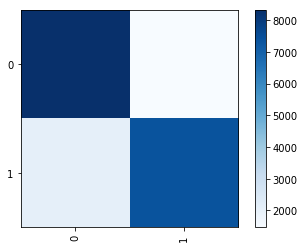

In [172]:
columns = ['0', '1']

plt.imshow(confusion_NB, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,], columns, rotation='vertical')
plt.yticks([0,1,], columns)
plt.colorbar()

plt.show()

In [173]:
print(classification_report(Y_test, y_hat7))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      9791
           1       0.83      0.78      0.81      9488

   micro avg       0.82      0.82      0.82     19279
   macro avg       0.82      0.82      0.82     19279
weighted avg       0.82      0.82      0.82     19279



**Comment:** As expected, Naive Bayes did not achieve good scores since its assumption is very strong. 

## 5. Evaluate the models and Future Improvement

We are now reaching the end of this project. Let's first examine the results got from all the models:

### (1) Comparing all the models

In [174]:
models = { }
models['Classifier'] = ['Logistic Regeression','KNN','Random Forest', 'Decision Tree', 'SVM', 'Naive Bayes']
models['Scores'] = [Logistic_Regression_score, KNN_score, Random_forest_score, Decision_tree_score,  svm_score, NB_score]
results = pd.DataFrame(models)
results

,Classifier,Scores
0,Logistic Regeression,0.853001
1,KNN,0.813320
2,Random Forest,0.857928
3,Decision Tree,0.826080
4,SVM,0.855698
5,Naive Bayes,0.816225


### (2) Fairness metric

In [198]:
x_train_nor[: , 31]
count_number = pd.value_counts(pd.Series(x_train_nor[: , 31]))
count_number

1.0    25280
0.0    19703
dtype: int64

In [ ]:
x_train_nor, Y_train
x_test_nor, Y_test

In [203]:
x_train_white = x_train_nor[np.where(x_train_nor[:,31] == 1)]
x_train_black = x_train_nor[np.where(x_train_nor[:,31] == 0)]
x_train_black.shape

(19703, 55)

In [213]:
train_all = np.column_stack((x_train_nor,Y_train))
train_all.shape

(44983, 56)

In [214]:
test_all = np.column_stack((x_test_nor,Y_test))
test_all.shape

(19279, 56)

In [220]:
Y_train_white = train_all[np.where(train_all[:, 31] == 1)]
Y_train_white = Y_train_white[:, -1]
Y_train_black = train_all[np.where(train_all[:, 31] == 0)]
Y_train_black = Y_train_black[:, -1]
Y_train_black.shape

(19703,)

In [221]:
Y_test_white = test_all[np.where(test_all[:, 31] == 1)]
Y_test_white = Y_test_white[:, -1]
Y_test_black = test_all[np.where(test_all[:, 31] == 0)]
Y_test_black = Y_test_black[:, -1]
Y_test_black.shape

(8571,)

In [216]:
x_test_white = x_test_nor[np.where(x_test_nor[:,31] == 1)]
x_test_black = x_test_nor[np.where(x_test_nor[:,31] == 0)]
x_test_black.shape

(8571, 55)

In [215]:
count_number = pd.value_counts(pd.Series(x_test_nor[: , 31]))
count_number

1.0    10708
0.0     8571
dtype: int64

In [243]:
logis_y_black.shape

(8571,)

## Fairness Metric: Statistical Parity

In [196]:
Logistic_Reg

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [244]:
Logistic_Reg_white = grid_search0.best_estimator_.fit(x_train_white, Y_train_white)
logis_y_white = Logistic_Reg_white.predict(x_test_white)
np.sum(logis_y_white) / np.size(logis_y_white)

0.5099925289503175

In [226]:
Logistic_Reg_black = grid_search0.best_estimator_.fit(x_train_black, Y_train_black)
logis_y_black = Logistic_Reg_black.predict(x_test_black)
np.sum(logis_y_black) / np.size(logis_y_black)

0.24594563061486407

In [176]:
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [231]:
KNN_Reg_white = grid_search.best_estimator_.fit(x_train_white, Y_train_white)
KNN_y_white = KNN_Reg_white.predict(x_test_white)
np.sum(KNN_y_white) / np.size(KNN_y_white)

0.5345536047814718

In [232]:
KNN_Reg_black = grid_search.best_estimator_.fit(x_train_black, Y_train_black)
KNN_y_black = KNN_Reg_black.predict(x_test_black)
np.sum(KNN_y_black) / np.size(KNN_y_black)

0.22237778555594445

In [177]:
Random_forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [234]:
rf_Reg_white = grid_search2.best_estimator_.fit(x_train_white, Y_train_white)
rf_y_white = rf_Reg_white.predict(x_test_white)
np.sum(rf_y_white) / np.size(rf_y_white)

0.518864400448263

In [235]:
rf_Reg_black = grid_search2.best_estimator_.fit(x_train_black, Y_train_black)
rf_y_black = rf_Reg_black.predict(x_test_black)
np.sum(rf_y_black) / np.size(rf_y_black)

0.2475790456189476

In [178]:
SVM

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [237]:
svm_Reg_white = grid_search5.best_estimator_.fit(x_train_white, Y_train_white)
svm_y_white = svm_Reg_white.predict(x_test_white)
np.sum(svm_y_white) / np.size(svm_y_white)

0.500653716847217

In [238]:
svm_Reg_black = grid_search5.best_estimator_.fit(x_train_black, Y_train_black)
svm_y_black = svm_Reg_black.predict(x_test_black)
np.sum(svm_y_black) / np.size(svm_y_black)

0.2464123206160308

## Fairness Metric: Equalized Odds

In [262]:
confusion_log_white = confusion_matrix(Y_test_white, logis_y_white)
confusion_log_black = confusion_matrix(Y_test_black, logis_y_black)
confusion_log_white

array([[3792,  444],
       [1455, 5017]], dtype=int64)

In [255]:
TPR_white_log = confusion_log_white[1][1] / (confusion_log_white[1][1] + confusion_log_white[0][1] )
TPR_white_log

0.9186962094854422

In [256]:
TPR_black_log = confusion_log_black[1][1] / (confusion_log_black[1][1] + confusion_log_black[0][1] )
TPR_black_log

0.9985768500948766

In [263]:
FPR_white_log = confusion_log_white[1][0] / (confusion_log_white[0][0] + confusion_log_white[1][0] )
FPR_white_log

0.2773013150371641

In [264]:
FPR_black_log = confusion_log_black[1][0] / (confusion_log_black[0][0] + confusion_log_black[1][0] )
FPR_black_log

0.1409562122853164

In [257]:
confusion_rf_white = confusion_matrix(Y_test_white, rf_y_white)
confusion_rf_black = confusion_matrix(Y_test_black, rf_y_black)
confusion_rf_black

array([[5542,   13],
       [ 907, 2109]], dtype=int64)

In [258]:
TPR_white_rf = confusion_rf_white[1][1] / (confusion_rf_white[1][1] + confusion_rf_white[0][1] )
TPR_white_rf

0.9188264938804895

In [259]:
TPR_black_rf = confusion_rf_black[1][1] / (confusion_rf_black[1][1] + confusion_rf_black[0][1] )
TPR_black_rf

0.9938737040527804

In [265]:
FPR_white_rf = confusion_rf_white[1][0] / (confusion_rf_white[0][0] + confusion_rf_white[1][0] )
FPR_white_rf

0.265333850931677

In [266]:
FPR_black_rf = confusion_rf_black[1][0] / (confusion_rf_black[0][0] + confusion_rf_black[1][0] )
FPR_black_rf

0.1406419599937975

In [268]:
confusion_knn_white = confusion_matrix(Y_test_white, KNN_y_white)
confusion_knn_black = confusion_matrix(Y_test_black, KNN_y_black)
confusion_knn_black

array([[5411,  144],
       [1254, 1762]], dtype=int64)

In [269]:
TPR_white_knn = confusion_knn_white[1][1] / (confusion_knn_white[1][1] + confusion_knn_white[0][1] )
TPR_white_knn

0.86722571628232

In [270]:
TPR_black_knn = confusion_knn_black[1][1] / (confusion_knn_black[1][1] + confusion_knn_black[0][1] )
TPR_black_knn

0.9244491080797481

In [271]:
FPR_white_knn = confusion_knn_white[1][0] / (confusion_knn_white[0][0] + confusion_knn_white[1][0] )
FPR_white_knn

0.3025682182985554

In [272]:
FPR_black_knn = confusion_knn_black[1][0] / (confusion_knn_black[0][0] + confusion_knn_black[1][0] )
FPR_black_knn

0.18814703675918978

In [273]:
confusion_svm_white = confusion_matrix(Y_test_white, svm_y_white)
confusion_svm_black = confusion_matrix(Y_test_black, svm_y_black)
confusion_svm_black

array([[5549,    6],
       [ 910, 2106]], dtype=int64)

In [274]:
TPR_white_svm = confusion_svm_white[1][1] / (confusion_svm_white[1][1] + confusion_svm_white[0][1] )
TPR_white_svm

0.9302368961014736

In [275]:
TPR_black_svm = confusion_svm_black[1][1] / (confusion_svm_black[1][1] + confusion_svm_black[0][1] )
TPR_black_svm

0.9971590909090909

In [277]:
FPR_white_svm= confusion_svm_white[1][0] / (confusion_svm_white[0][0] + confusion_svm_white[1][0] )
FPR_white_svm

0.27772582756685993

In [276]:
FPR_black_svm= confusion_svm_black[1][0] / (confusion_svm_black[0][0] + confusion_svm_black[1][0] )
FPR_black_svm

0.1408886824585849

## 6. References of Source Code

Here are all the websites, related works and documents we have referred to. For the literature review part, please check the final paper for details.

Sklearn:
- LabelEncoder instruction: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- LogisticRegressionCV instruction: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
- KNeighborsClassifier instruction: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- MultinomialNB instruction: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
- RandomForestClassifier instruction: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- DecisionTreeClassifier instruction: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- MLPClassifier instruction: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
- SVC instruction: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Keras:
- Keras Instruction: https://keras.io/models/model/
- Loss Definition: https://keras.io/losses/
- Multiclass classification tutorial: https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

How to tuning parameters (Some documents are in Chinese):
- LogisticRegressionCV summary: https://www.cnblogs.com/pinard/p/6035872.html
- KNeighborsClassifier example and summary: https://zhuanlan.zhihu.com/p/23191325
- How to choose a good K: https://www.quora.com/How-can-I-choose-the-best-K-in-KNN-K-nearest-neighbour-classification
- RandomForestClassifier summary: http://www.cnblogs.com/pinard/p/6160412.html
- DecisionTreeClassifier summary: https://www.jianshu.com/p/78594737b4b4
- MLPClassifier example and summary: https://blog.csdn.net/u011311291/article/details/78743393
- MLPClassifier parameters analysis: https://blog.csdn.net/Mrzhang0419/article/details/79519994
- Basics of Naive Bayes: https://harshanavalkar.blogspot.com/2018/10/basics-of-naive-bayes-algorithm-data.html
- SVC summary: https://blog.csdn.net/github_39261590/article/details/75009069
- SVC example: https://blog.csdn.net/SummerStoneS/article/details/78551757
- Prior selection of SVM class_weight: https://stats.stackexchange.com/questions/24959/a-priori-selection-of-svm-class-weights?rq=1
- StackClassifier parameters analysis: https://blog.csdn.net/github_35965351/article/details/60763606

Other documents and related works we refered to:
- Example of Random Forest Classification with CV: https://www.kaggle.com/akp1596/titanic-problem-random-forest-classifier-with-cv
- Ensemble Methods example: https://github.com/vsmolyakov/experiments_with_python/blob/master/chp01/ensemble_methods.ipynb
- Multiclass classification example: https://github.com/sundeeppothula1993/Multi-class-classification/blob/master/Multi-class%2BClassification.ipynb
- Guidance to encode categorical values: http://pbpython.com/categorical-encoding.html
- Professor Enric Junque de Fortuny's Machine Learning Notes: http://10.208.12.75/book/index.html
